of data https://www.kaggle.com/datasets/alanchn31/free-spoken-digits

# 데이터 준비

In [1]:
!rm -rf mnist_audio.zip
!wget https://github.com/dhrim/DMC_2022/raw/master/material/deep_learning/data/mnist_audio.zip

--2022-06-30 08:05:32--  https://github.com/dhrim/DMC_2022/raw/master/material/deep_learning/data/mnist_audio.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/DMC_2022/master/material/deep_learning/data/mnist_audio.zip [following]
--2022-06-30 08:05:32--  https://raw.githubusercontent.com/dhrim/DMC_2022/master/material/deep_learning/data/mnist_audio.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16271789 (16M) [application/zip]
Saving to: ‘mnist_audio.zip’

mnist_audio.zip     100%[===================>]  15.52M  --.-KB/s    in 0.06s   

2022-06-30 08:05:33 (271 MB/s) - ‘mnist_audio

In [2]:
!rm -rf mnist_audio
!unzip mnist_audio.zip

Archive:  mnist_audio.zip
   creating: mnist_audio/
  inflating: mnist_audio/0_george_0.wav  
  inflating: mnist_audio/0_george_1.wav  
  inflating: mnist_audio/0_george_10.wav  
  inflating: mnist_audio/0_george_11.wav  
  inflating: mnist_audio/0_george_12.wav  
  inflating: mnist_audio/0_george_13.wav  
  inflating: mnist_audio/0_george_14.wav  
  inflating: mnist_audio/0_george_15.wav  
  inflating: mnist_audio/0_george_16.wav  
  inflating: mnist_audio/0_george_17.wav  
  inflating: mnist_audio/0_george_18.wav  
  inflating: mnist_audio/0_george_19.wav  
  inflating: mnist_audio/0_george_2.wav  
  inflating: mnist_audio/0_george_20.wav  
  inflating: mnist_audio/0_george_21.wav  
  inflating: mnist_audio/0_george_22.wav  
  inflating: mnist_audio/0_george_23.wav  
  inflating: mnist_audio/0_george_24.wav  
  inflating: mnist_audio/0_george_25.wav  
  inflating: mnist_audio/0_george_26.wav  
  inflating: mnist_audio/0_george_27.wav  
  inflating: mnist_audio/0_george_28.wav  
  inf

# 파일 1개 들어보고 로딩해 보기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import IPython

IPython.display.Audio('mnist_audio/9_yweweler_9.wav')

In [5]:
import librosa
SAMPLING_RATE = 22050
data, sampling_rate = librosa.load('mnist_audio/9_yweweler_9.wav', sr=SAMPLING_RATE)

In [6]:
print(len(data))
print(data)
print(sampling_rate)

9667
[-8.2852159e-05 -1.8724090e-04 -2.5001296e-04 ... -1.2657163e-04
 -7.1468705e-05  0.0000000e+00]
22050


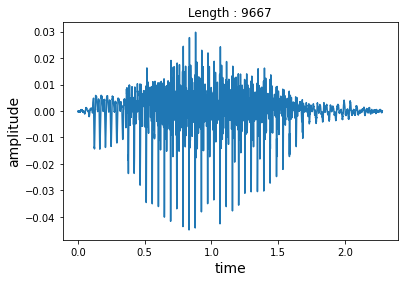

In [7]:
plt.plot(np.linspace(0, sampling_rate/len(data), len(data)), data)

plt.xlabel('time', fontsize = 14)
plt.ylabel('amplitude', fontsize = 14)
plt.title('Length : ' + str(len(data)))

plt.show()

In [8]:
IPython.display.Audio(data, rate=SAMPLING_RATE)

# 데이터 로딩

In [9]:
import glob

file_list = glob.glob("mnist_audio/*.wav")
print(len(file_list))
print(file_list[:3])

3000
['mnist_audio/6_nicolas_31.wav', 'mnist_audio/9_theo_49.wav', 'mnist_audio/3_jackson_8.wav']


In [10]:
def load_wav(file_name):
    data, _ = librosa.load(file_name, sr=SAMPLING_RATE)
    return data

raw_x = []
raw_y = []
for file_name in file_list:
    label = int(file_name.split("/")[1].split("_")[0])
    print(file_name, label)
    data = load_wav(file_name)
    raw_x.append(data)
    raw_y.append(label)


mnist_audio/6_nicolas_31.wav 6
mnist_audio/9_theo_49.wav 9
mnist_audio/3_jackson_8.wav 3
mnist_audio/9_theo_5.wav 9
mnist_audio/8_theo_48.wav 8
mnist_audio/1_jackson_26.wav 1
mnist_audio/3_yweweler_44.wav 3
mnist_audio/2_theo_6.wav 2
mnist_audio/5_nicolas_21.wav 5
mnist_audio/5_theo_25.wav 5
mnist_audio/1_theo_12.wav 1
mnist_audio/9_nicolas_25.wav 9
mnist_audio/1_jackson_39.wav 1
mnist_audio/3_lucas_15.wav 3
mnist_audio/6_yweweler_43.wav 6
mnist_audio/3_theo_9.wav 3
mnist_audio/5_yweweler_48.wav 5
mnist_audio/9_george_46.wav 9
mnist_audio/8_lucas_19.wav 8
mnist_audio/9_theo_1.wav 9
mnist_audio/0_jackson_48.wav 0
mnist_audio/9_george_26.wav 9
mnist_audio/0_nicolas_25.wav 0
mnist_audio/6_george_12.wav 6
mnist_audio/0_theo_3.wav 0
mnist_audio/4_george_32.wav 4
mnist_audio/1_nicolas_48.wav 1
mnist_audio/0_theo_30.wav 0
mnist_audio/0_yweweler_2.wav 0
mnist_audio/8_nicolas_47.wav 8
mnist_audio/6_lucas_22.wav 6
mnist_audio/4_george_8.wav 4
mnist_audio/8_george_16.wav 8
mnist_audio/5_yweweler_

In [11]:
print(raw_y[0])
IPython.display.Audio(raw_x[0], rate=SAMPLING_RATE)

6


In [12]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

9


In [13]:
print(raw_y[2])
IPython.display.Audio(raw_x[2], rate=SAMPLING_RATE)

3


# padding

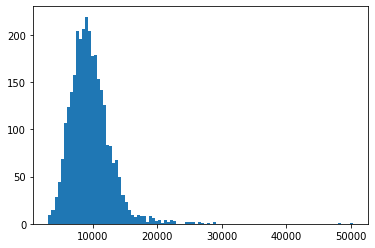

In [14]:
lens = []
for i in range(len(raw_x)):
    lens.append(len(raw_x[i]))

plt.hist(lens, bins=100)
plt.show()

In [15]:
from tensorflow.keras.preprocessing import sequence

padded_raw_x = sequence.pad_sequences(raw_x, maxlen=22000, padding='post', dtype=float)

In [16]:
print(raw_y[0])
IPython.display.Audio(raw_x[0], rate=SAMPLING_RATE)

6


In [17]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

9


In [18]:
print(raw_y[2])
IPython.display.Audio(raw_x[2], rate=SAMPLING_RATE)

3


In [19]:
raw_x = np.array(padded_raw_x)
raw_y = np.array(raw_y)
print(raw_x.shape)
print(raw_y.shape)

(3000, 22000)
(3000,)


In [20]:
print(raw_y[0])
IPython.display.Audio(raw_x[0], rate=SAMPLING_RATE)

6


In [21]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

9


In [22]:
print(raw_y[2])
IPython.display.Audio(raw_x[2], rate=SAMPLING_RATE)

3


# Normalization

In [23]:
max = np.max(raw_x)
min = np.min(raw_x)
print(min, max)

-1.0124074220657349 1.0405950546264648


In [24]:
# raw_x = (raw_x - min) / (max - min)

# 2차원으로 reshape

In [25]:
raw_x = raw_x.reshape((len(raw_x),-1,1))

# 데이터 분리

In [26]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(raw_x, raw_y, test_size=0.2, shuffle=True)

In [27]:
print(train_y[0])
IPython.display.Audio(train_x[0].squeeze(), rate=SAMPLING_RATE)

7


In [28]:
print(train_y[1])
IPython.display.Audio(train_x[1].squeeze(), rate=SAMPLING_RATE)

4


In [29]:
print(train_y[2])
IPython.display.Audio(train_x[2].squeeze(), rate=SAMPLING_RATE)

3


In [30]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

In [33]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input, Activation
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Conv1D, MaxPooling1D, AveragePooling1D, Add, MaxPool1D
from tensorflow.keras.layers import Dropout, GaussianNoise, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2
from tensorflow.keras.optimizers import Adam

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(GaussianNoise(0.01))

for i in range(13):
    model.add(Conv1D(64, 3, padding="same", activation="relu", kernel_regularizer=l1()))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling1D())

model.add(Flatten())
model.add(Dense(64, activation="relu", kernel_regularizer=l1()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["acc"])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise_2 (GaussianN  (None, 22000, 1)         0         
 oise)                                                           
                                                                 
 conv1d_26 (Conv1D)          (None, 22000, 64)         256       
                                                                 
 batch_normalization_28 (Bat  (None, 22000, 64)        256       
 chNormalization)                                                
                                                                 
 dropout_28 (Dropout)        (None, 22000, 64)         0         
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 11000, 64)        0         
 g1D)                                                            
                                                      

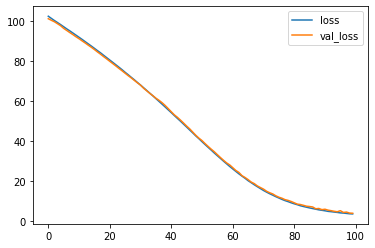

loss =  3.6109893321990967 , val_loss =  3.9369661808013916
135/135 [==============================] - 4s 31ms/step - loss: 3.6110 - acc: 0.7727 - val_loss: 3.9370 - val_acc: 0.6000


In [34]:
plot_losses = PlotLosses()
history = model.fit(train_x, train_y, epochs=100, verbose=1, validation_split=0.1, batch_size=16,
                    callbacks=[plot_losses])

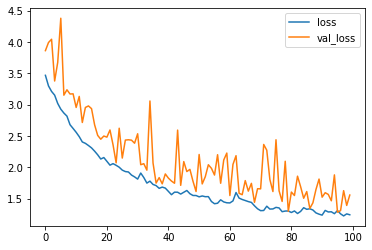

loss =  1.2451868057250977 , val_loss =  1.55964195728302
135/135 [==============================] - 4s 31ms/step - loss: 1.2452 - acc: 0.8736 - val_loss: 1.5596 - val_acc: 0.7958


In [35]:
history = model.fit(train_x, train_y, epochs=100, verbose=1, validation_split=0.1, batch_size=16,
                    callbacks=[plot_losses])

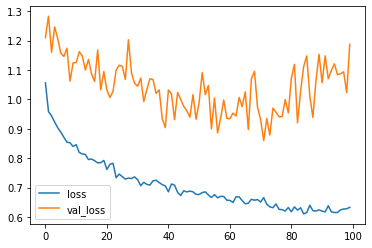

loss =  0.6327046751976013 , val_loss =  1.1872717142105103
135/135 [==============================] - 4s 32ms/step - loss: 0.6327 - acc: 0.9477 - val_loss: 1.1873 - val_acc: 0.7542


In [37]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.00001), metrics=["acc"])
history = model.fit(train_x, train_y, epochs=100, verbose=1, validation_split=0.1, batch_size=16,
                    callbacks=[plot_losses])

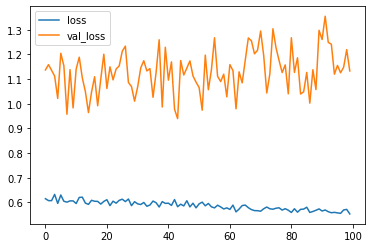

loss =  0.5531554818153381 , val_loss =  1.132599949836731
135/135 [==============================] - 4s 31ms/step - loss: 0.5532 - acc: 0.9523 - val_loss: 1.1326 - val_acc: 0.7625


In [38]:
history = model.fit(train_x, train_y, epochs=100, verbose=1, validation_split=0.1, batch_size=16,
                    callbacks=[plot_losses])

19/19 [==============================] - 1s 21ms/step - loss: 2.8153 - acc: 0.4183
loss= 2.815264940261841
acc= 0.4183333218097687


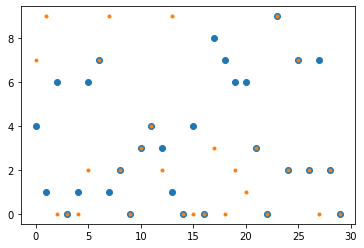

In [ ]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], '.')
plt.show()